In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

In [2]:
model = tf.keras.models.load_model('teeth_classification_model.h5')
X_test = np.load('X_data.npy')
y_test = np.load('y_data.npy')


In [3]:
y_pred = model.predict(X_test[..., np.newaxis])
y_pred_classes = np.argmax(y_pred, axis=1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 748ms/step


In [4]:
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.00      0.98        28
           2       0.86      0.89      0.87        35
           3       0.97      0.97      0.97        37
           4       0.97      0.97      0.97        30
           5       0.97      0.94      0.96        36
           6       0.94      0.91      0.93        35

    accuracy                           0.95       233
   macro avg       0.95      0.95      0.95       233
weighted avg       0.95      0.95      0.95       233



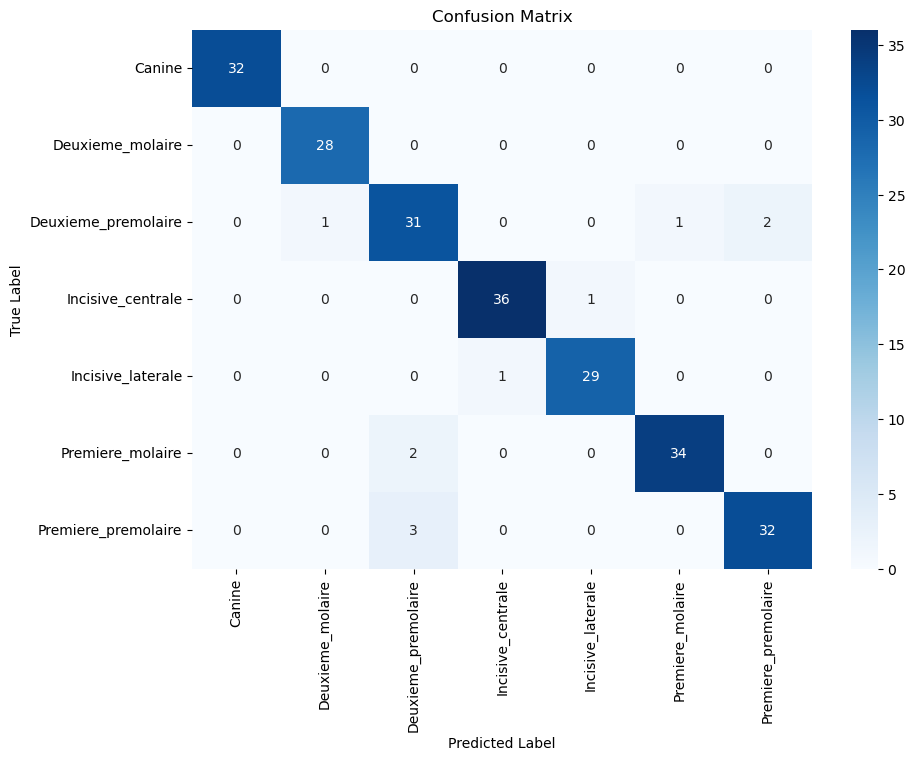

In [5]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Canine', 'Deuxieme_molaire', 'Deuxieme_premolaire', 'Incisive_centrale', 'Incisive_laterale', 'Premiere_molaire', 'Premiere_premolaire'], yticklabels=['Canine', 'Deuxieme_molaire', 'Deuxieme_premolaire', 'Incisive_centrale', 'Incisive_laterale', 'Premiere_molaire', 'Premiere_premolaire'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [6]:
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))


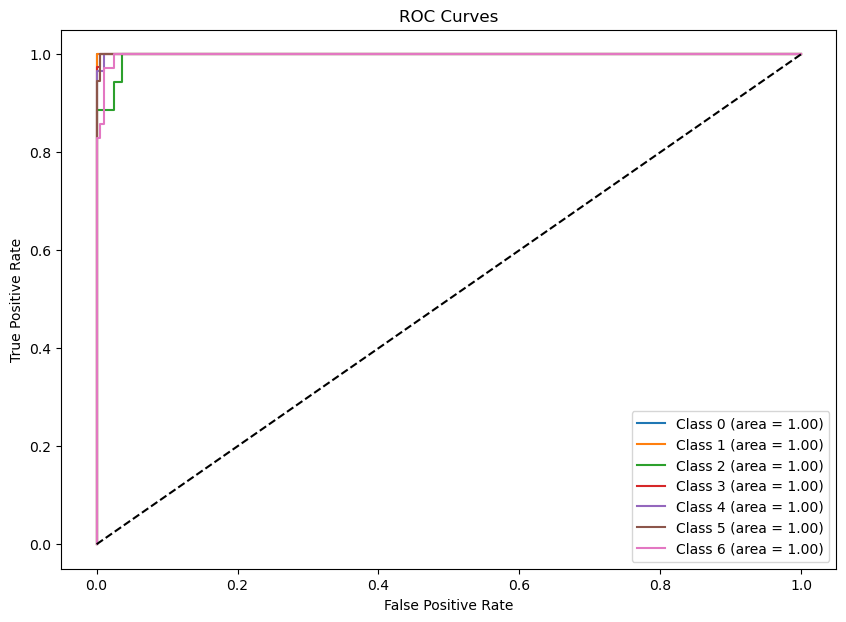

In [9]:
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()